In [35]:

import numpy as np
import matplotlib.pyplot as plt

#                ->   [x1,    x2]
individuo = np.array([[5, 7],       
                      [6, 8],      
                      [2, 4],      
                      [3, 5], 
                      [7, 9],
                              ])

clases = np.array([1, 1, 2, 2,3])

# Calcular centroides iniciales como promedios de cada clase
centroide_clase1 = np.mean(individuo[clases == 1], axis=0)  # [5.5, 7.5]
centroide_clase2 = np.mean(individuo[clases == 2], axis=0)  # [2.5, 4.5]
centroide_clase3 = individuo[clases == 3][0]               # [7,9] (solo hay un punto)

# pesos    se pueden cambiar
w =np.array( [[5.5, 2.5, 7.0], # pesos para x1
              [7.5, 4.5, 9.0], # pesos para x2
                        ])
# Parámetro de aprendizaje
pa = 1

# Número de épocas
num_epocas = 4

# Tamaño de la matriz de pesos
num_neuronas = w.shape[1]  # 5 neuronas
longitud = num_neuronas - 1  # 4 (índice máximo)

for epoca in range(num_epocas):
    print(f"\n--- Época {epoca + 1} ---")
    
    for i in range(len(individuo)):
        print(f"\nProcesando individuo {i}: {individuo[i]}  clase {i}: {clases[i]}"  )
        
        # 1. Calcular distancias euclidianas entre el individuo y todas las neuronas
        distancias = []
        for j in range(num_neuronas):
            dx = w[0, j] - individuo[i, 0]
            dy = w[1, j] - individuo[i, 1]
            D = dx**2 + dy**2  # Distancia euclidiana al cuadrado
            distancias.append(D)
        
        print("Distancias calculadas:", distancias)
        
        # 2. Encontrar la neurona ganadora (menor distancia)
        indice_min = np.argmin(distancias)
        valor_min = distancias[indice_min]
        print(f"Neurona ganadora: índice {indice_min}, distancia {valor_min:.4f}")
        
        # 3. Comparamos si el valor minimo es igual a la clase en curso
        if valor_min == clases[i]:
            print("La neurona ganadora CORRESPONDE a la clase del dato (mover hacia el patrón)")
            # Actualización positiva (acercar pesos al dato)
            w[0, indice_min] += pa * (individuo[i, 0] - w[0, indice_min])
            w[1, indice_min] += pa * (individuo[i, 1] - w[1, indice_min])
        else:
            print("La neurona ganadora NO CORRESPONDE a la clase del dato (alejar del patrón)")
            # Actualización negativa (alejar pesos del dato)
            w[0, indice_min] -= pa * (individuo[i, 0] - w[0, indice_min])
            w[1, indice_min] -= pa * (individuo[i, 1] - w[1, indice_min])
        
        print("Pesos actualizados:")
        print(w)

print("\n--- Pesos finales ---")
print(w)


--- Época 1 ---

Procesando individuo 0: [5 7]  clase 0: 1
Distancias calculadas: [0.5, 12.5, 8.0]
Neurona ganadora: índice 0, distancia 0.5000
La neurona ganadora NO CORRESPONDE a la clase del dato (alejar del patrón)
Pesos actualizados:
[[6.  2.5 7. ]
 [8.  4.5 9. ]]

Procesando individuo 1: [6 8]  clase 1: 1
Distancias calculadas: [0.0, 24.5, 2.0]
Neurona ganadora: índice 0, distancia 0.0000
La neurona ganadora NO CORRESPONDE a la clase del dato (alejar del patrón)
Pesos actualizados:
[[6.  2.5 7. ]
 [8.  4.5 9. ]]

Procesando individuo 2: [2 4]  clase 2: 2
Distancias calculadas: [32.0, 0.5, 50.0]
Neurona ganadora: índice 1, distancia 0.5000
La neurona ganadora NO CORRESPONDE a la clase del dato (alejar del patrón)
Pesos actualizados:
[[6. 3. 7.]
 [8. 5. 9.]]

Procesando individuo 3: [3 5]  clase 3: 2
Distancias calculadas: [18.0, 0.0, 32.0]
Neurona ganadora: índice 1, distancia 0.0000
La neurona ganadora NO CORRESPONDE a la clase del dato (alejar del patrón)
Pesos actualizados:
[[

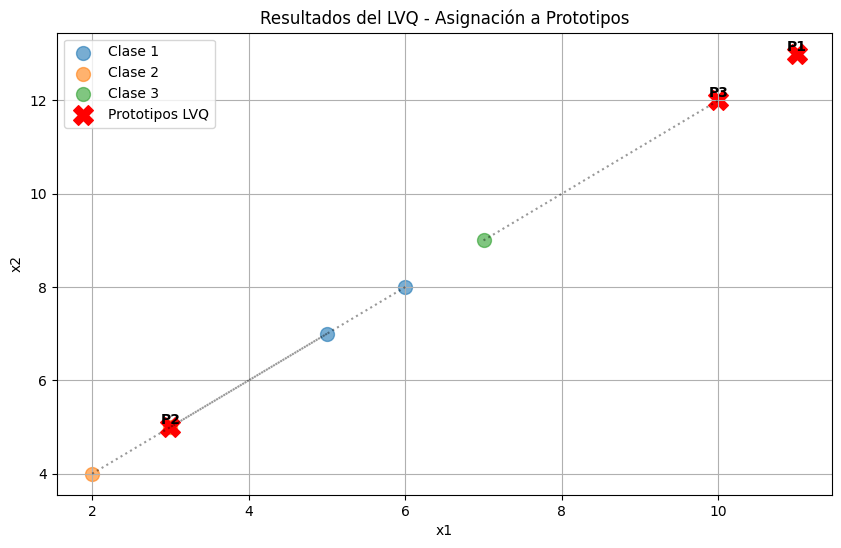

In [36]:
plt.figure(figsize=(10, 6))

# Graficar los datos originales coloreados por su clase verdadera
for clase in np.unique(clases):
    mask = clases == clase
    plt.scatter(individuo[mask, 0], individuo[mask, 1], 
                c=f'C{clase-1}', label=f'Clase {clase}', s=100, alpha=0.6)

# Graficar los pesos finales de las neuronas (centroides)
plt.scatter(w[0, :], w[1, :], c='red', marker='X', s=200, label='Prototipos LVQ')

# Mostrar la clase de cada prototipo (asumiendo que w.shape[1] == número de clases)
for j in range(w.shape[1]):
    plt.text(w[0, j], w[1, j], f'P{j+1}', ha='center', va='bottom', fontweight='bold')

# Asignar cada punto a su prototipo ganador (neurona más cercana)
for i in range(len(individuo)):
    distancias = [np.linalg.norm(individuo[i] - w[:, j]) for j in range(w.shape[1])]
    prototipo_ganador = np.argmin(distancias)
    
    # Línea punteada entre punto y su prototipo
    plt.plot([individuo[i, 0], w[0, prototipo_ganador]], 
             [individuo[i, 1], w[1, prototipo_ganador]], 
             'k:', alpha=0.4)

plt.title('Resultados del LVQ - Asignación a Prototipos')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

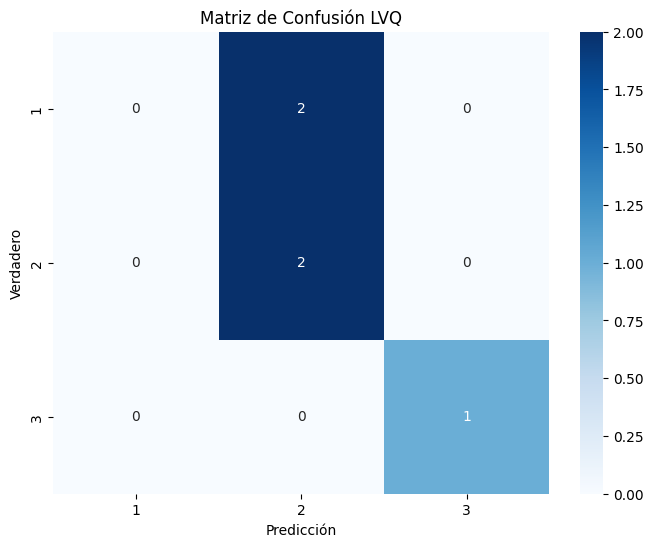

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predecir clases basado en prototipos más cercanos
predicciones = []
for i in range(len(individuo)):
    distancias = [np.linalg.norm(individuo[i] - w[:, j]) for j in range(w.shape[1])]
    predicciones.append(np.argmin(distancias) + 1)  # +1 si tus clases comienzan en 1

# Matriz de confusión
cm = confusion_matrix(clases, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(clases), 
            yticklabels=np.unique(clases))
plt.title('Matriz de Confusión LVQ')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()